In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

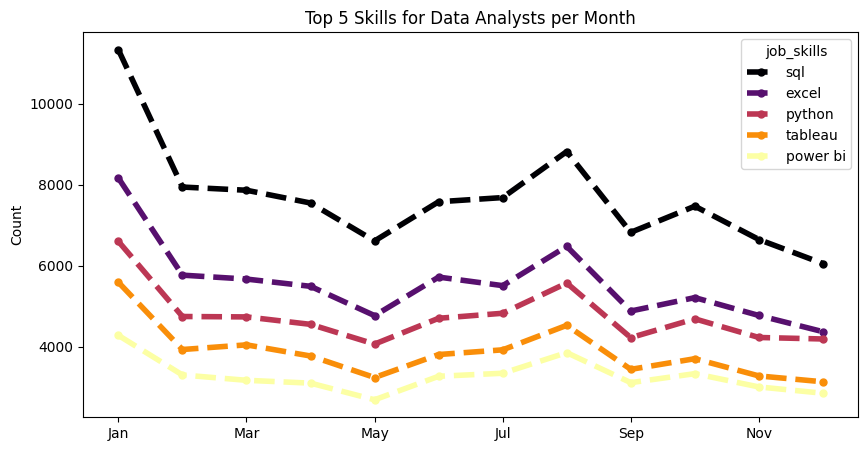

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle = '--',
    colormap='inferno',
    marker = 'o',
    markersize = 5,
    figsize= (10,5)
    )

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

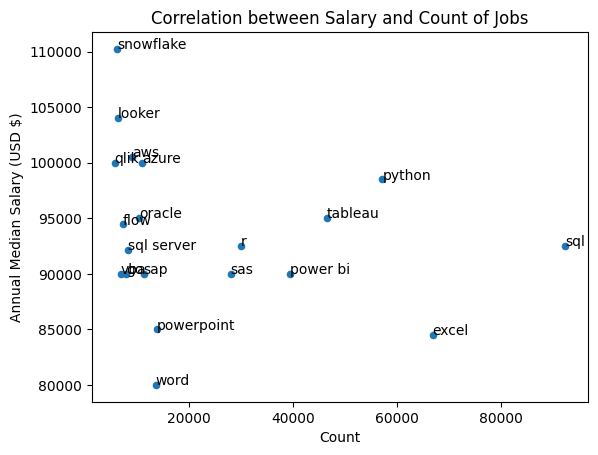

In [ ]:
df_DA = df_DA.explode('job_skills').copy()
skill_stat = df_DA.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
skill_list = 20
skill_stat = skill_stat.sort_values(by='skill_count', ascending= False).head(skill_list)
skill_stat.plot(
    kind = 'scatter',
    x = 'skill_count',
    y = 'median_salary'
)
plt.xlabel('Count')
plt.ylabel('Annual Median Salary (USD $)')
plt.title('Correlation between Salary and Count of Jobs')
for i ,txt in enumerate(skill_stat.index):
    plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt)
plt.show()

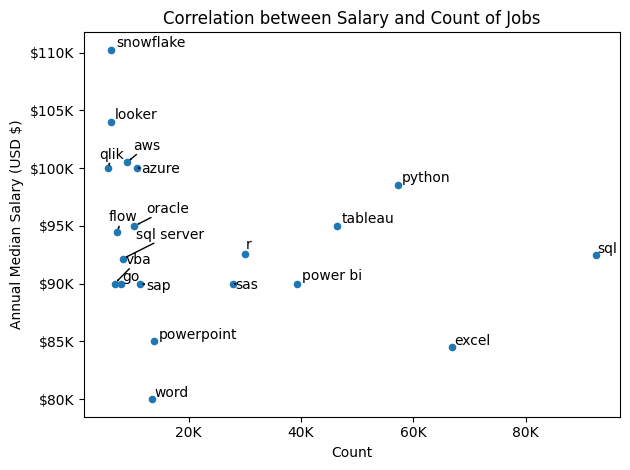

In [ ]:
from adjustText import adjust_text
skill_list = 20
skill_stat = skill_stat.sort_values(by='skill_count', ascending= False).head(skill_list)

#Plotting the scatter chart
skill_stat.plot(
    kind = 'scatter',
    x = 'skill_count',
    y = 'median_salary'
)
#Labeling all the datapoints 
texts=[]
for i ,txt in enumerate(skill_stat.index):
    texts.append(plt.text(skill_stat['skill_count'].iloc[i],skill_stat['median_salary'].iloc[i],txt))
adjust_text(texts, arrowprops = dict(arrowstyle = '->', color='black', lw= 1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'{int(x/1000)}K'))
#Setting labels and title
plt.xlabel('Count')
plt.ylabel('Annual Median Salary (USD $)')
plt.title('Correlation between Salary and Count of Jobs')

plt.tight_layout()
plt.show()



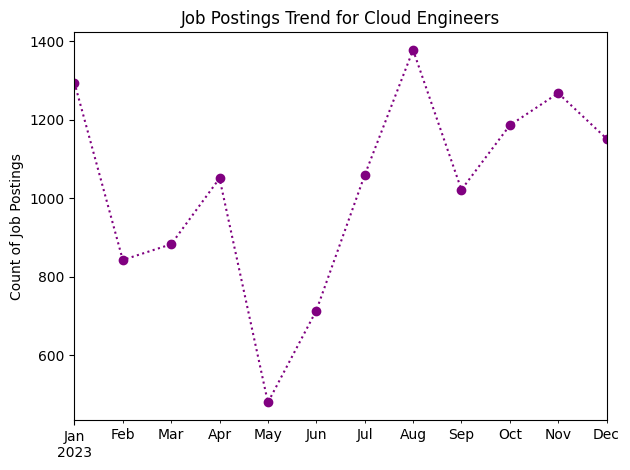

In [22]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

monthly_posting = df_ce.groupby('job_posted_month').size()

monthly_posting.plot(
    kind = 'line',
    linestyle = 'dotted',
    color = 'purple',
    marker = 'o',
    title = 'Job Postings Trend for Cloud Engineers',
    ylabel= 'Count of Job Postings',
    xlabel= '')
plt.tight_layout()
plt.show()

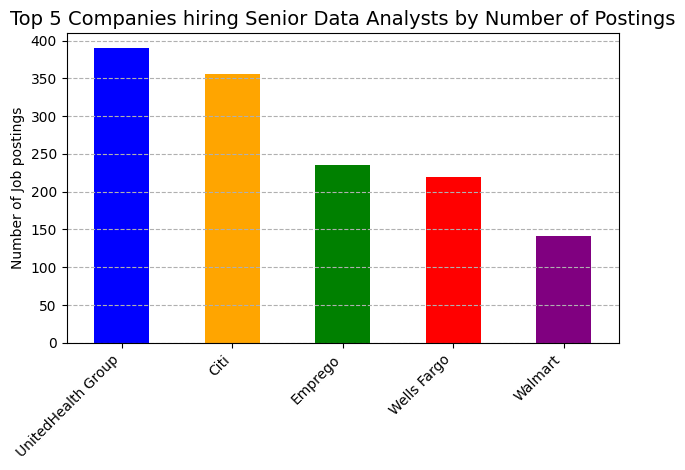

In [40]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

job_count = SDA_df['company_name'].value_counts().head()
colors = ['blue', 'orange', 'green', 'red', 'purple']

job_count.plot(
    kind = 'bar',
    xlabel= '',
    ylabel = 'Number of Job postings',
    color = colors)
plt.xticks(rotation = 45, ha ='right')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.grid(axis ='y', linestyle = '--')
plt.tight_layout()
plt.show()
